# Test VGG16 Architcture

# Importing Libraries

In [1]:
import os
from pathlib import Path

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

In [5]:
!pip install sklearn

In [6]:
!pip install scikit-learn

In [7]:
!pip install pillow

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import numpy as np

%matplotlib inline

# Designing a Convolution Neural Network (CNN): 

In [9]:
# Imports
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions

VGG_types = {
    "VGG11": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG13": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG16": [
        64,
        64,
        "M",
        128,
        128,
        "M",
        256,
        256,
        256,
        "M",
        512,
        512,
        512,
        "M",
        512,
        512,
        512,
        "M",
    ],
    "VGG19": [
        64,
        64,
        "M",
        128,
        128,
        "M",
        256,
        256,
        256,
        256,
        "M",
        512,
        512,
        512,
        512,
        "M",
        512,
        512,
        512,
        512,
        "M",
    ],
}


class VGG_net(nn.Module):
    def __init__(self, in_channels=1, num_classes=3):
        super(VGG_net, self).__init__()
        self.in_channels = in_channels
        self.conv_layers = self.create_conv_layers(VGG_types["VGG16"])

        self.fcs = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fcs(x)
        return x

    def create_conv_layers(self, architecture):
        layers = []
        in_channels = self.in_channels

        for x in architecture:
            if type(x) == int:
                out_channels = x

                layers += [
                    nn.Conv2d(
                        in_channels=in_channels,
                        out_channels=out_channels,
                        kernel_size=(3, 3),
                        stride=(1, 1),
                        padding=(1, 1),
                    ),
                    nn.BatchNorm2d(x),
                    nn.ReLU(),
                ]
                in_channels = x
            elif x == "M":
                layers += [nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))]

        return nn.Sequential(*layers)

In [10]:
model = VGG_net()
print(model)


VGG_net(
  (conv_layers): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3),

In [11]:
model.load_state_dict(torch.load(r"C:\Users\HP\Desktop\Model\VGG16\VGG16_With_Aug\VGG16_Updated_85.pth", map_location={'cuda:0': 'cpu'}))

model.eval()

VGG_net(
  (conv_layers): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3),

In [12]:
from PIL import Image

In [13]:
def make_prediciton(image_path):
    image = Image.open(image_path).convert("L")
    pretrained_size = 224
    pretrained_means = [0.5]
    pretrained_stds = [0.5]

    train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5)),
            ])
        
    image = train_transforms(image)    
    image = image.reshape(1, 1, 224, 224)
    predict = model(image)
    softmax = nn.Softmax(dim=1)
    predict = softmax(predict)
    probability , prediction = torch.max(predict, dim = 1)
    #converting torch tensor into numpy array
    probability = probability.detach().numpy()[0]
    prediction = prediction.detach().numpy()[0]
    
    return probability, prediction

In [15]:
# make_prediciton(test_dataset[0][0])

In [14]:
make_prediciton(r"C:\Users\HP\Desktop\Model\DATASET\Testing\malignant\malignant (47).png")

(0.8815846, 1)

In [15]:
make_prediciton(r"C:\Users\HP\Desktop\Model\DATASET\Testing\benign\benign (1).png")

(0.99993074, 0)

In [16]:
make_prediciton(r"C:\Users\HP\Desktop\Model\DATASET\Testing\normal\normal (1).png")

(0.6469046, 2)

In [17]:
# Hyper parameters
epochs = 30
num_classes = 3
batch_size = 32
learning_rate = 0.001


In [18]:
# CPU or GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [21]:
test_transforms = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        transforms.Normalize((0.5),(0.5)),
                       ])


valid_transforms = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        transforms.Normalize((0.5),(0.5)),
                       ])

In [22]:
test_dataset = torchvision.datasets.ImageFolder(root= r"C:\Users\HP\Desktop\Model\DATASET\Testing", transform = test_transforms)
# test_dataset = torchvision.datasets.ImageFolder(root= r"C:\Users\HP\Desktop\Model\DATASET", transform = test_transforms)

In [23]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 155
    Root location: C:\Users\HP\Desktop\Model\DATASET\Testing
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [24]:
test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle=True, num_workers=2)

In [25]:
from tqdm import tqdm

In [26]:
test_dataset[100]

(tensor([[[-0.9529, -0.9137, -0.9216,  ..., -0.6392, -0.9608, -0.9843],
          [-0.9451, -0.9216, -0.9059,  ..., -0.5922, -0.9059, -0.9922],
          [-0.9608, -0.9373, -0.9373,  ..., -0.5922, -0.7882, -0.9765],
          ...,
          [-0.9451, -0.9373, -0.9294,  ..., -0.9137, -0.9137, -0.9059],
          [-0.9373, -0.9451, -0.9451,  ..., -0.8980, -0.9137, -0.9373],
          [-0.9294, -0.9373, -0.9373,  ..., -0.8980, -0.9216, -0.9137]]]),
 1)

In [27]:
preds = []
target = []
probabilities = []
individual_prob = []

for images, labels in tqdm(test_loader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            outputs = nn.Softmax(dim=1)(outputs)
            prob, predicted = torch.max(outputs.data, 1)
            #Tensor from GPU to CPU by converting pytorch numpy to tensor array
            predicted = predicted.cpu().numpy()
            outputs = outputs.cpu().detach().numpy()
            prob = prob.cpu().detach().numpy()
            labels = labels.cpu().numpy()
            preds.append(predicted)
            target.append(labels)
            #Finding probabilies for each probabilities
            probabilities.append(list(outputs))
            individual_prob.append(list(prob))
            
        

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:59<00:00, 23.87s/it]


Converting 2-D into 1-D array

In [39]:
probabilities1 = []
individual_prob1 = []
preds1 = []
target1 = []

for i in probabilities:
  for j in i:
    probabilities1.append(j)

for i in individual_prob:
  for j in i:
    individual_prob1.append(j)
    
for i in preds:
  for j in i:
    preds1.append(j)
    
for i in target:
  for j in i:
    target1.append(j)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [41]:
accuracy_score(target1,preds1)

0.8580645161290322

In [42]:
print(classification_report(target1,preds1))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        87
           1       0.92      0.57      0.71        42
           2       0.86      0.96      0.91        26

    accuracy                           0.86       155
   macro avg       0.88      0.83      0.84       155
weighted avg       0.87      0.86      0.85       155



In [43]:
confusion_matrix(target1,preds1)

array([[84,  2,  1],
       [15, 24,  3],
       [ 1,  0, 25]], dtype=int64)

In [44]:
import matplotlib.pyplot as plt
import numpy
from sklearn .metrics import roc_auc_score, roc_curve
import seaborn as sns


In [45]:
test_dataset.classes

['benign', 'malignant', 'normal']

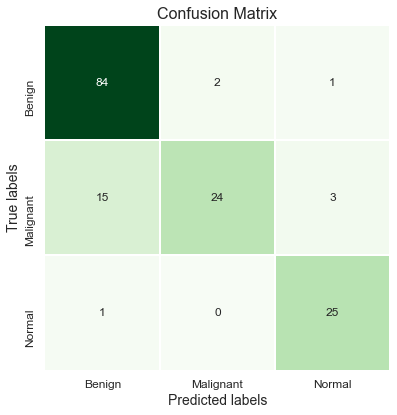

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_cm(confusion):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Greens", square=True, 
                cbar=False, annot_kws={"size": 12}, linewidths=0.5)
    plt.xlabel('Predicted labels', fontsize=14)
    plt.ylabel('True labels', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    classes = ['Benign', 'Malignant', 'Normal'] 
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks + 0.5, classes, fontsize=12)
    plt.yticks(tick_marks + 0.5, classes, fontsize=12)
    plt.tight_layout()
    plt.show()

from sklearn.metrics import confusion_matrix

# Assuming target1 and preds1 are the true labels and predicted labels, respectively
confusion = confusion_matrix(target1, preds1, labels=[0, 1, 2])
plot_cm(confusion)


In [47]:
auc = np.round(roc_auc_score(target1, probabilities1, multi_class = 'ovr'), 3)
print("Auc score for our sample data is {}". format(auc))

Auc score for our sample data is 0.949


In [48]:
probabilities2 = np.array([i for i in probabilities1])

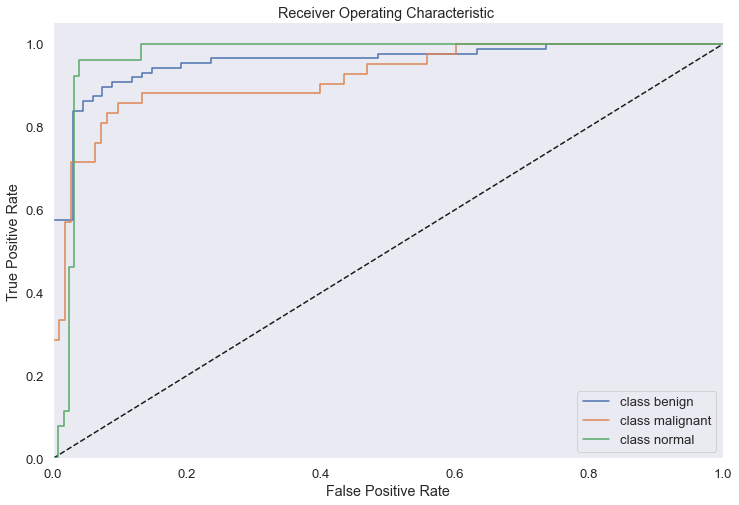

In [49]:
def plot_multiclass_roc(y_score, y_test, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    threshold = dict()

    for i in range(n_classes):    
      fpr[i], tpr[i], threshold[i] = roc_curve(target1, probabilities2[:,i], pos_label=i)
    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic ')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label = 'class '+ test_dataset.classes[i])
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(probabilities2, target1, n_classes=3, figsize=(12,8))